## Discriminator | multilayer perceptron

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2

from tensorflow.keras.utils import plot_model

In [64]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)    

In [65]:
def build_discriminator(img_shape):

    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Fully connected layer
    model.add(Dense(128))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    return model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


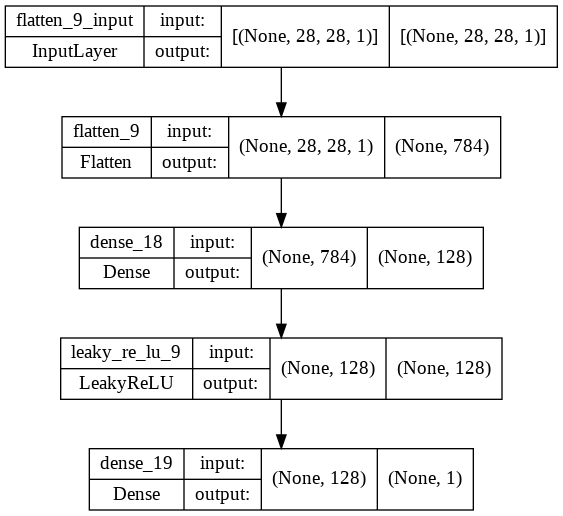

In [79]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
discriminator.summary()
plot_model(discriminator, to_file='model.png', show_shapes=True)


In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [80]:
def show_img(img, figsize=(2,2)):
    fig = plt.figure(figsize=figsize,dpi=100)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

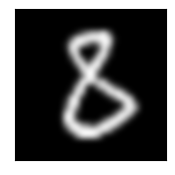

In [10]:
show_img(X_train[602])

In [81]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()

    char = 1 #True image
    X_train_1 = X_train[np.where(y_train==char)]    

    char = 7 #Fake image
    X_train_7 = X_train[np.where(y_train==char)]  

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train_1 = X_train_1 / 127.5 - 1.0
    X_train_7 = X_train_7 / 127.5 - 1.0
   # X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train_1.shape[0], batch_size)
        imgs = X_train_1[idx]

        # Get a random batch of fake images
        idx = np.random.randint(0, X_train_7.shape[0], batch_size)
        fake_img = X_train_7[idx]

        # Generate a batch of fake images　(random noize of [-1 1])
        #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
        #fake_img = np.zeros((batch_size, 28, 28)) -1.0
        #print(fake_img.shape)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(fake_img , fake)
       # print(d_loss_real, d_loss_fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)


        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            #print("%d [D loss: %f] " %
            #      (iteration + 1, d_loss))
            print("%d [D loss: %f, acc.: %.2f%%] " %
                  (iteration + 1, d_loss, 100.0 * accuracy))

            # Output a sample of generated image
 

In [28]:
discriminator.metrics_names

['loss', 'accuracy']

In [82]:
# Set hyperparameters
iterations = 10
batch_size = 256
sample_interval = 1

# Train the Discriminator for the specified number of iterations
train(iterations, batch_size, sample_interval)

1 [D loss: 2.776924, acc.: 38.67%] 
2 [D loss: 0.999669, acc.: 50.00%] 
3 [D loss: 0.246990, acc.: 97.46%] 
4 [D loss: 0.548724, acc.: 59.77%] 
5 [D loss: 0.531213, acc.: 61.91%] 
6 [D loss: 0.299817, acc.: 90.82%] 
7 [D loss: 0.185481, acc.: 95.51%] 
8 [D loss: 0.214205, acc.: 91.80%] 
9 [D loss: 0.197379, acc.: 92.97%] 
10 [D loss: 0.147609, acc.: 94.34%] 


0 

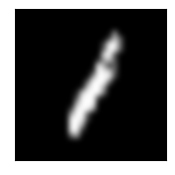

1 

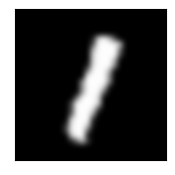

2 

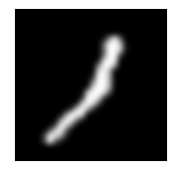

3 

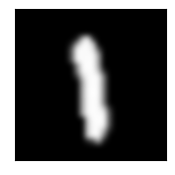

4 

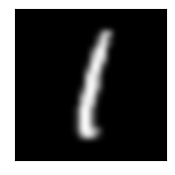

5 

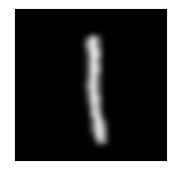

6 

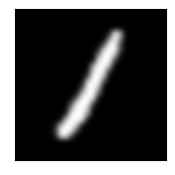

7 

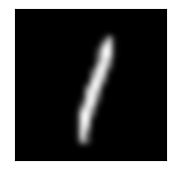

8 

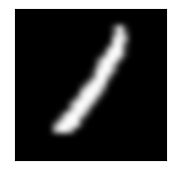

9 

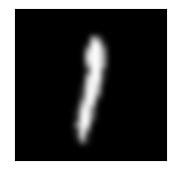

10 

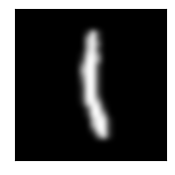

11 

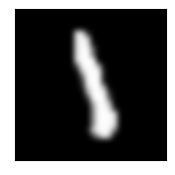

12 

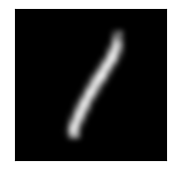

13 

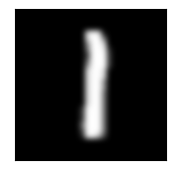

14 

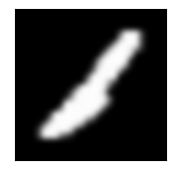

15 

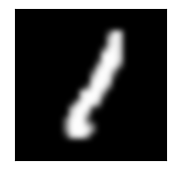

16 

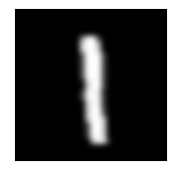

17 

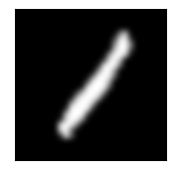

18 

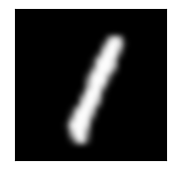

19 

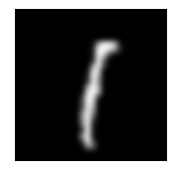

[[1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [0.9999907]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]
 [1.       ]]
(array([], dtype=int64), array([], dtype=int64))
0 

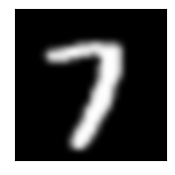

1 

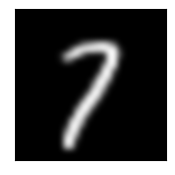

2 

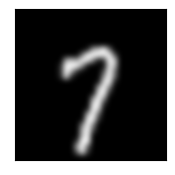

3 

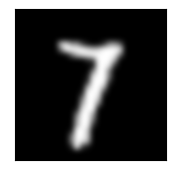

4 

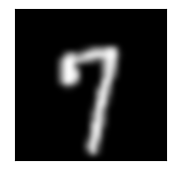

5 

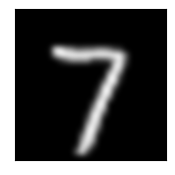

6 

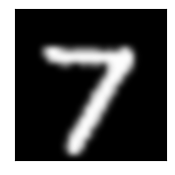

7 

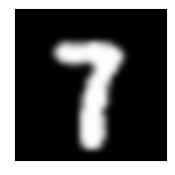

8 

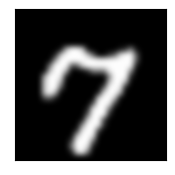

9 

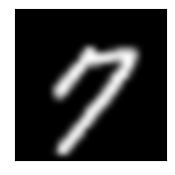

10 

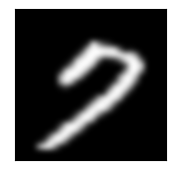

11 

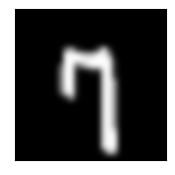

12 

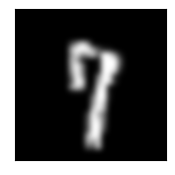

13 

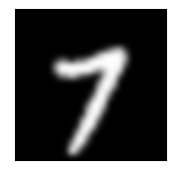

14 

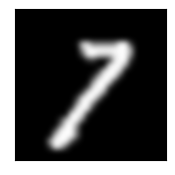

15 

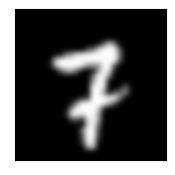

16 

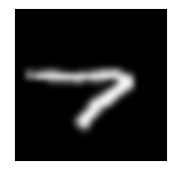

17 

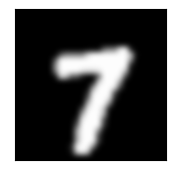

18 

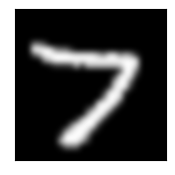

19 

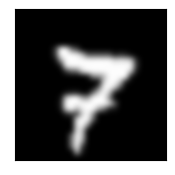

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(array([ 1,  3, 14]), array([0, 0, 0]))


In [105]:
#fake_img = np.zeros((batch_size, 28, 28)) -1
 #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
(X_train, _), (X_test, _) = mnist.load_data()
char = 1 #True image
X_test_1 = X_test[np.where(y_test==char)]    

char = 7 #Fake image
X_test_7 = X_test[np.where(y_test==char)]  

test_size = 20

#### test 1: real image
idx = np.random.randint(0, X_test_1.shape[0], test_size)
imgs_1 = X_test_1[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_1[i])

y = discriminator.predict(imgs_1)
print(y)

false = np.where(y<=0.5)
print(false)


#### test 7: fake image
idx = np.random.randint(0, X_test_7.shape[0], test_size)
imgs_7 = X_test_7[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_7[i])

y = discriminator.predict(imgs_7)
print(y)
false = np.where(y>=0.5)
print(false)

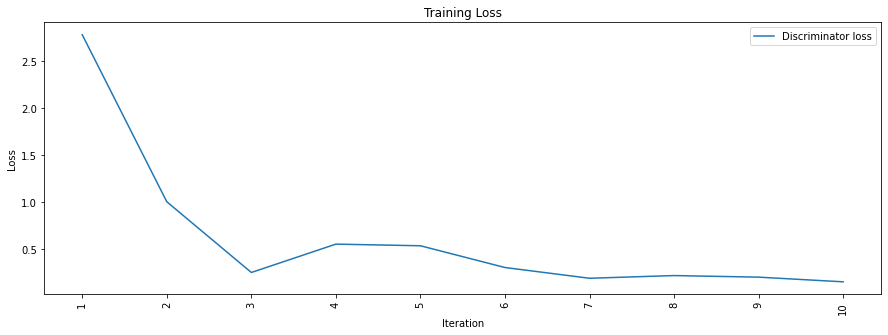

In [106]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")


plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()